<a href="https://colab.research.google.com/github/gabrielcapela/Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/Credit-Card-Fraud-Detection-/main/images/myself.png" align=right>

#**Churn Prediction Project**

*by Gabriel Capela*

[<img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>](https://www.linkedin.com/in/gabrielcapela)
[<img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white" />](https://medium.com/@gabrielcapela)

---

**Churn prediction** is the process of identifying customers who are likely to stop using a company's products or services. By anticipating churn, businesses can take proactive measures to retain customers, reducing revenue loss and improving long-term profitability. It is a crucial tool for enhancing customer loyalty and **optimizing marketing strategies**.



<p align="center">
<img width=40% src="https://github.com/gabrielcapela/Churn-Prediction/blob/main/images/three-friends-job.jpg?raw=true">
</p>


The CRoss Industry Standard Process for Data Mining ([CRISP-DM](https://www.ibm.com/docs/pt-br/spss-modeler/saas?topic=dm-crisp-help-overview)) methodology will be used to guide the stages of this project. In this project **supervised machine learning** algorithms will be used to predict the **churning rate**, which is the evasion rate of your customer base.

The data to be used comes from [Kaggle](https://www.kaggle.com/datasets/mahmoudshaheen1134/telecom-churn-clean-dataset/data) and is about customers of a telecom company.

#Business Understanding

**Churn rate**, or simply churn, refers to the percentage of customers who leave a service over a certain period. In services like Spotify or Netflix, it represents the rate at which users cancel their subscriptions.

This rate is crucial for business management. Analyzing churn over time can reveal underlying issues that need to be addressed. **It can be used to identify potential cancellations in advance**, enabling businesses to take proactive actions aimed at retaining those customers. This metric is especially important because **Customer Acquisition Cost (CAC) is typically higher than the cost of retaining customers**. In other words, a high churn rate is something that companies strive to avoid.

The challenge in this project is to predict, based on individual user data, whether they will cancel their subscription. **In Machine Learning, this is framed as a classification problem**, where each new user record is classified as either 0 (user stays) or 1 (user churns). **This task will be tackled using supervised learning algorithms**.

The primary performance metric for the model will be **Recall**, which focuses on the proportion of actual churned customers that the model successfully identifies. The goal is to ensure **few customers who are likely to leave the service go undetected by the algorithm.** Additionally, other metrics such as Precision and Accuracy will be considered to ensure a balance between detecting churn and minimizing false predictions.


#Data Understanding

Understanding the data set in detail is essential to **identifying patterns**, **relationships**, and **potential issues** that could impact customer churn prediction.

The dataset used can be downloaded from this [page](https://github.com/gabrielcapela/Churn-Prediction/blob/main/telecom_customer_churn_.csv) and includes several quantitative and categorical variables for each customer, as well as **a binary variable indicating whether the customer has dropped out or not**.

This section will be divided into five steps: obtaining and summary analysis of data, checking for missing values, checking for outliers, univariate analysis and multivariate analysis.

## Obtaining and Summary Analysis of Data

First, let's import the necessary packages and the dataset and check its first few lines.

In [ ]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
df = pd.read_csv('https://github.com/gabrielcapela/Churn-Prediction/raw/refs/heads/main/telecom_customer_churn_.csv')
#Showing the first 10 lines
df.head(10)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


Below is the meaning of each variable:




*   **Unnamed: 0**: The index of the dataframe, automatically generated when saving or loading the file.
*   **account_length**: The duration the customer has been with the telecom company, probably in days or months.

*   **area_code**: The customer's area code, which might indicate their location.
*   **international_plan**: Indicates whether the customer has an international calling plan (Yes/No or 1/0).

*   **voice_mail_plan**: Indicates whether the customer has a voicemail plan (Yes/No or 1/0).
*   **number_vmail_messages**: The number of voicemail messages received by the customer.
*   **total_day_minutes**: The total number of minutes the customer used for daytime calls.
*   **total_day_calls**: The total number of calls made by the customer during the day.
*   **total_day_charge**: The total charge for daytime calls made by the customer.
*   **total_eve_minutes**: The total number of minutes used for evening calls by the customer.
*   **total_eve_calls**: The total number of calls made by the customer during the evening.
*   **total_eve_charge**: The total charge for evening calls made by the customer.
*   **total_night_minutes**: The total number of minutes used for nighttime calls by the customer.
*   **total_night_calls**: The total number of calls made by the customer during the night.


*   **total_night_charge**: The total charge for nighttime calls made by the customer.
*   **total_intl_minutes**: The total number of minutes used for international calls by the customer.

*   **total_intl_calls**: The total number of international calls made by the customer.
*   **total_intl_charge**: The total charge for international calls made by the customer.


*   **customer_service_calls**: The number of times the customer called the customer service of the company.

*   **churn**: The target variable, indicating whether the customer churned (1) or stayed (0).





Checking the dataset size and variable type:

In [ ]:
#Showing the shape of dataset
print(f"The data set has {df.shape[0]} rows and {df.shape[1]} columns.")

The data set has 3333 rows and 20 columns.


In [ ]:
#Showing the  variables types
print(df.dtypes)

Unnamed: 0                  int64
account_length              int64
area_code                   int64
international_plan          int64
voice_mail_plan             int64
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                       int64
dtype: object


**Some observations** can already be made:




*   Although of type int64, the variables **area_code**, **international_plan**, and **voice_mail_plan** are categorical.

*   Column **Unnamed: 0**  represents a unique number for each row and can be deleted


##Checking for Missing Values

In [ ]:
# Check for missing values ​​by column
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


There are **no missing values** ​​in our dataset.

##Checking for Outliers

To **search for outliers**, data from the numeric columns **account_length**, **number_vmail_messages**,  **total_day_minutes**, **total_day_calls**, **total_day_charge**, **total_eve_minutes**, **total_eve_calls**,  **total_eve_charge**, **total_night_minutes**, **total_night_calls**, **total_night_charge**, **total_intl_minutes**, **total_intl_calls**,  **total_intl_charge** and **customer_service_calls** will be checked.

The **Z-Score method** will be used with a limit equal to 3.

In [ ]:
columns_num = ['account_length', 'number_vmail_messages',  'total_day_minutes',
                   'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                   'total_eve_calls',  'total_eve_charge', 'total_night_minutes',
                   'total_night_calls',  'total_night_charge','total_intl_minutes',
                   'total_intl_calls',  'total_intl_charge', 'customer_service_calls']
df_out = df.copy()

# Checking each column in turn
for column in columns_num:
    mean = df[column].mean()
    std = df[column].std()

    # Calculating the Z-Score for the column
    z_scores = (df_out[column] - mean) / std

    # Filter DataFrame by removing rows with Z-Score above threshold
    df_out = df_out[z_scores.abs() <= 3]


print(f"Percentage of outliers data: {(1-(df_out.shape[0]/df.shape[0]))*100:.3f}%")


Percentage of outliers data: 4.920%


These data considered outliers **will be deleted** in the Data Preparation.

##Univariate Analysis

First, let's check **basic descriptive** data for each variable:

In [ ]:
print(df.describe())

       Unnamed: 0  account_length    area_code  international_plan  \
count  3333.00000     3333.000000  3333.000000         3333.000000   
mean   1666.00000      101.064806   437.182418            0.096910   
std     962.29855       39.822106    42.371290            0.295879   
min       0.00000        1.000000   408.000000            0.000000   
25%     833.00000       74.000000   408.000000            0.000000   
50%    1666.00000      101.000000   415.000000            0.000000   
75%    2499.00000      127.000000   510.000000            0.000000   
max    3332.00000      243.000000   510.000000            1.000000   

       voice_mail_plan  number_vmail_messages  total_day_minutes  \
count      3333.000000            3333.000000        3333.000000   
mean          0.276628               8.099010         179.775098   
std           0.447398              13.688365          54.467389   
min           0.000000               0.000000           0.000000   
25%           0.000000       



*   We can verify that the **target variable has an average of 0.145**. Which means 14.5% of the values ​​are equal to 1 (churn) and 85.5% of the values ​​are equal to 0 (not churn). With this, we then have a problem of **unbalanced data problem,** which will need to be treated before modeling.

Let's check the **distribution** of quantitative variables

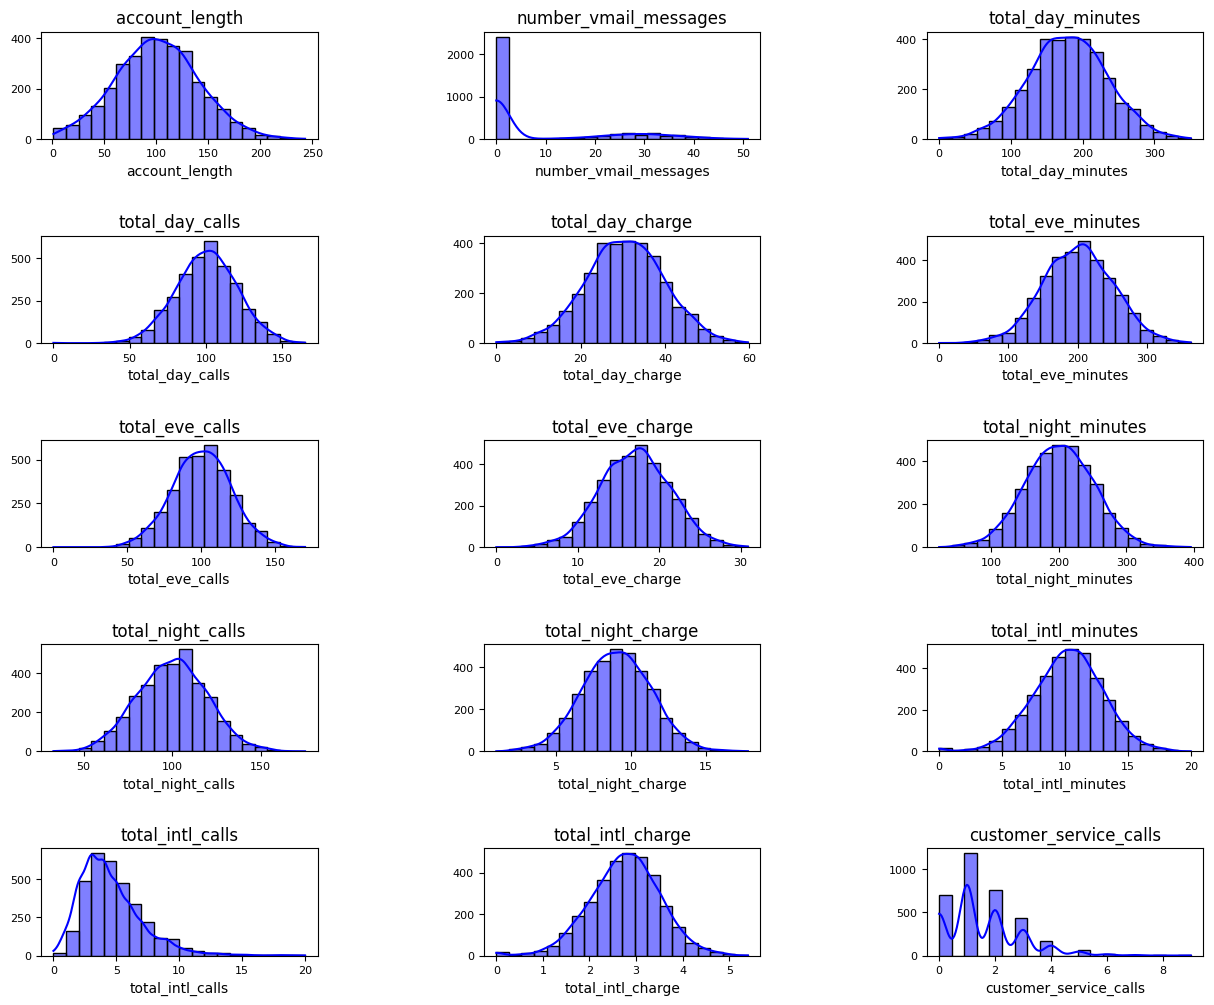

In [ ]:
columns_num = ['account_length', 'number_vmail_messages',  'total_day_minutes',
                   'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                   'total_eve_calls',  'total_eve_charge', 'total_night_minutes',
                   'total_night_calls',  'total_night_charge','total_intl_minutes',
                   'total_intl_calls',  'total_intl_charge', 'customer_service_calls']
plt.figure(figsize=(15, 12))

# Loop to create each graph
for i, column in enumerate(columns_num, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[column], kde=True, bins=20, color='blue')
    plt.title(f"{column}")

    plt.ylabel('')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.subplots_adjust(hspace=0.9, wspace=0.6)
plt.show()


*   With the exception of the variables **customer_service_calls** and **number_vmail_messages**, all variables were shown to have a Gaussian-like distribution, indicating that this data set was probably standardized. This will reduce some work in Data Preparation.




Analyzing **categorical variables**:

We know that the categorical variables **international_plan**,  **voice_mail_plan** and **churn** are **binary**, reflecting the **yes/no** information.

First, let's check the **number of unique values** ​​of the variable **area_code** and then visualize the distribution of all these categorical variables.

In [ ]:
print(f"Unique values for area_code: {df['area_code'].nunique()}")

Unique values for area_code: 3


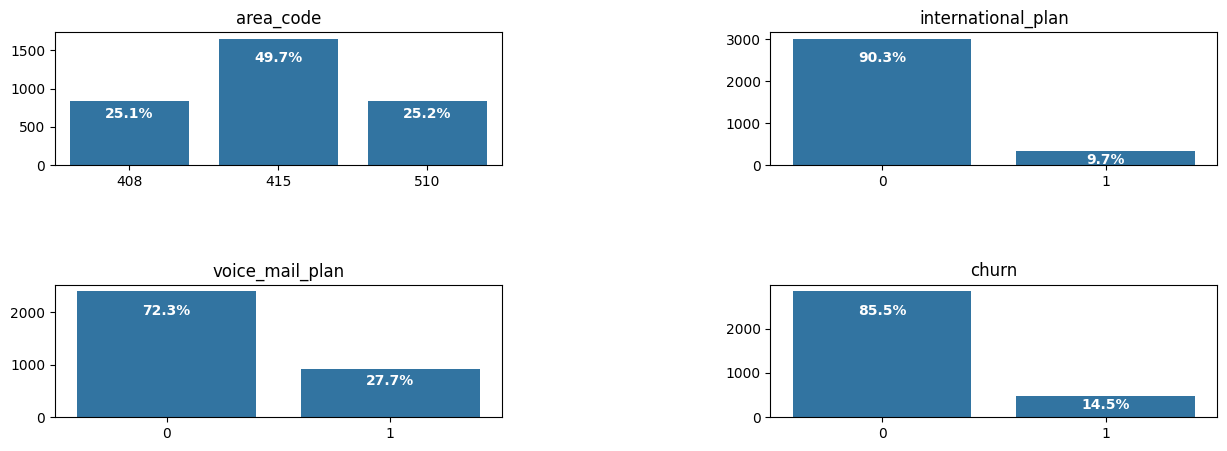

In [ ]:
# List of numeric variables that are actually categorical
categorical_numerical_vars = ['area_code', 'international_plan', 'voice_mail_plan', 'churn']

plt.figure(figsize=(15, 5))
# Loop to create each graph
for i, column in enumerate(categorical_numerical_vars, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(x=df[column])

    # Calculates and adds percentages within bars
    total = len(df[column])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2, p.get_height() * 0.9),  # Adjusting the position within the bar
                    ha='center', va='top', fontsize=10, color='white', weight='bold')

    plt.title(f"{column}")
    plt.xlabel('')
    plt.ylabel("")
    plt.xticks()

plt.subplots_adjust(hspace=0.9, wspace=0.6)
plt.show()


* the variable **area_code** demonstrates a reasonable distribution of the data. Some **data preprocessing technique** can be applied to this variable for use in the modeling phase, so that its values ​​are not interpreted as integers.

*   We can realize **most of customers don't have** the international plan or the voice mail plan.

##Multivariate Analysis

Let's check the **correlation between the numerical variables**, where values ​​close to 1 and -1 indicate a strong correlation and values ​​close to 1 indicate almost zero correlation.

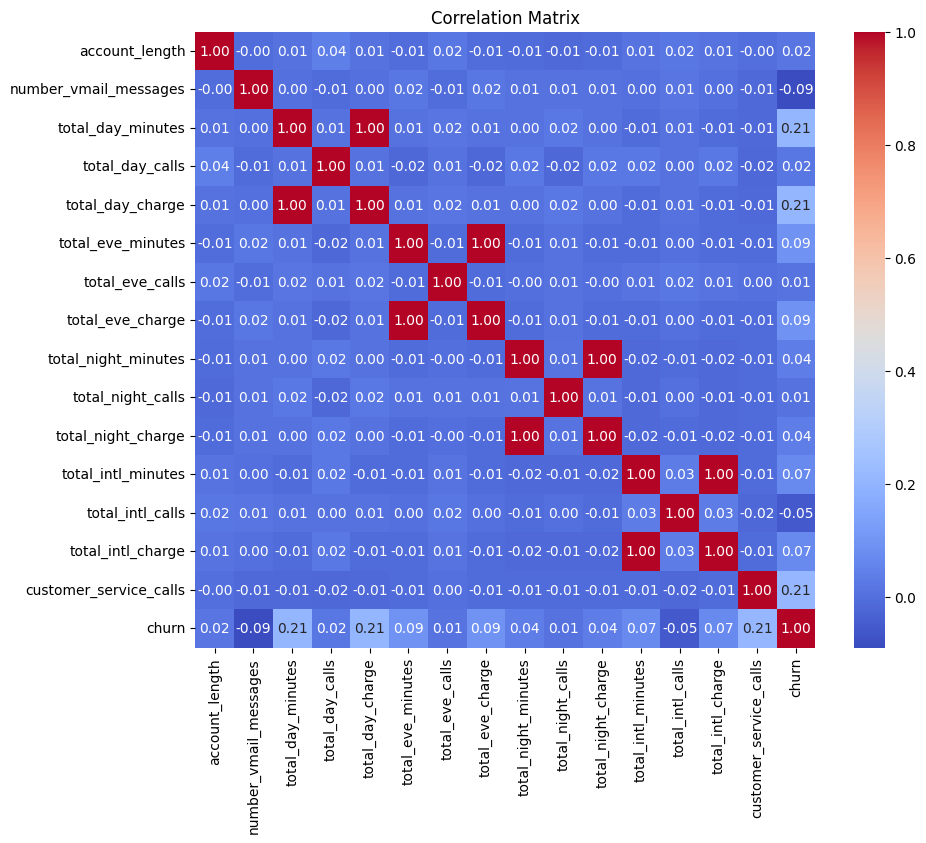

In [ ]:
columns_num = ['account_length', 'number_vmail_messages',  'total_day_minutes',
                   'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                   'total_eve_calls',  'total_eve_charge', 'total_night_minutes',
                   'total_night_calls',  'total_night_charge','total_intl_minutes',
                   'total_intl_calls',  'total_intl_charge', 'customer_service_calls', 'churn']
df_num = df[columns_num]
correlation_matrix = df_num.corr()
# Printing a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

* We noticed the most of variables have a **weak correlation**. This weak correlation with the target variable **can harm certain classification algorithms** such as logistic regression. However, the variables **total_day minutes**,  **total_day_charge** and **customer_service_calls** stands out with higher correlations.

* As expected, the variables representing the **number of minutes** consumed during each period of the day are **directly related** to the **corresponding charges** for those calls.

Now **among the categorical variables**, it is important to visualize the **relationship of each one with the target** variable:

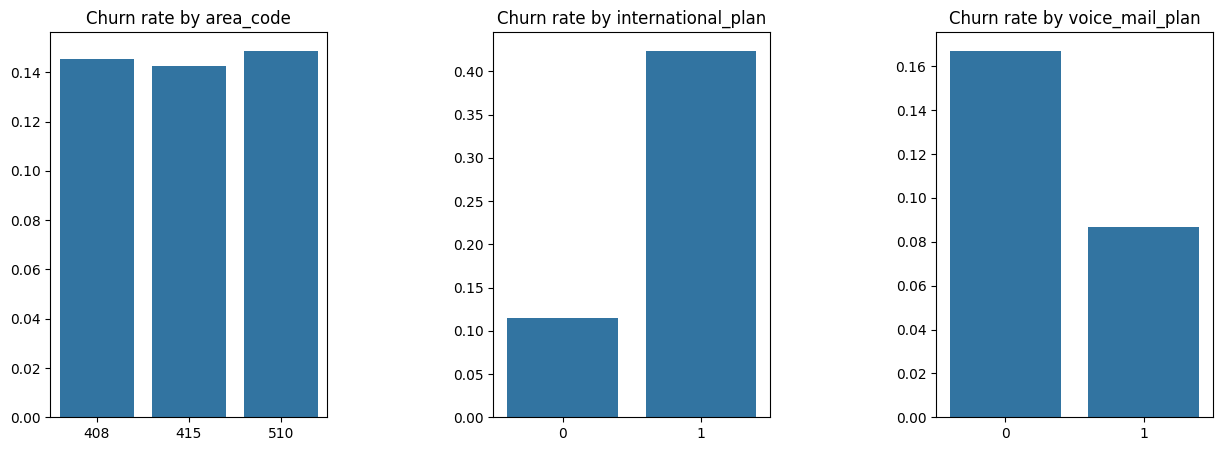

In [ ]:
plt.figure(figsize=(15, 5))
cat_var = ['area_code', 'international_plan', 'voice_mail_plan']
#Creating the graphics
for i, cat_var in enumerate(cat_var, 1):

    plt.subplot(1, 3, i)
    sns.barplot(x=df[cat_var], y=df['churn'], errorbar=None)
    plt.title(f'Churn rate by {cat_var}')
    plt.xlabel('')
    plt.ylabel('')

plt.subplots_adjust(hspace=0.9, wspace=0.6)
plt.show()

**Some insights:**


*   The churn rate is well distributed across all **area_code** classes, this variable will probably **not have much influence** in the prediction.

*   Customers **who have an international plan have their churn rate almost tripled**, which demonstrates a great influence of this variable.

*   Customers **who do not have a voice plan are about twice as likely to leave the service** as customers who have a voice plan.

#Data Preparation

In this step, we will **clean the data** according to the insights from the previous step. After that, feature engineering techniques will be used to **enable the modeling of categorical data**, transforming it into discrete data. Finally,the data will then be **divided between training and test sets**.

##Data Cleaning

We will delete the entire **first column** and the **outliers** identified by the zcores method.

In [ ]:
# Making changes in a copy of the dataset
df_clean = df.copy()

#Deleting the spare index
df_clean = df_clean.drop(columns=['Unnamed: 0'])

In [ ]:
columns_num = ['account_length', 'number_vmail_messages',  'total_day_minutes',
                   'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                   'total_eve_calls',  'total_eve_charge', 'total_night_minutes',
                   'total_night_calls',  'total_night_charge','total_intl_minutes',
                   'total_intl_calls',  'total_intl_charge', 'customer_service_calls']
# Checking each numeric column in turn
for column in columns_num:
    mean = df[column].mean()
    std = df[column].std()

    # Calculating the Z-Score for the column
    z_scores = (df_clean[column] - mean) / std

    # Filter DataFrame by removing rows with Z-Score above threshold
    df_clean = df_clean[z_scores.abs() <= 3]

print(f"{(1-df_clean.shape[0]/df.shape[0])*100:.2f} % of the original data were excluded")

4.92 % of the original data were excluded


In [ ]:
df_clean.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


##Feature Engineering

###One-Hot Enconding

One-Hot Encoding is a data preprocessing technique that **converts categorical variables into binary columns**, with each column representing a distinct category. This method is particularly useful when the variable has a limited number of categories, ensuring that each category is treated independently **without implying any order or relationship between them**.

In this case, we will apply One-Hot Encoding to the **area_code** variable, as it has a **small number of distinct values**.

In [ ]:
#One-Hot Encoding for 'area_code'
df_ft_eng = df_clean.copy()
df_one_hot = pd.get_dummies(df_ft_eng['area_code'], drop_first=False).astype(int)

#Concatenating the transformations to the original DataFrame
df_ft_eng = pd.concat([df_ft_eng.drop(columns=['area_code']), df_one_hot], axis=1)

#All column names must be in string format for future model packages to work correctly
df_ft_eng.columns = df_ft_eng.columns.astype(str)

In [ ]:
#Showing the final columns
print (df_ft_eng.shape)
df_ft_eng.columns

(3169, 21)


Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn', '408', '415',
       '510'],
      dtype='object')

In [ ]:
df_ft_eng.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,408,415,510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,0,1,0


##Feature Scaling

**Standardization** is a preprocessing technique that transforms variables to have a mean of zero and a standard deviation of one. This is done by subtracting the mean from each variable and dividing by its standard deviation.

Standardization is crucial when variables have different scales or units, **as it ensures that no variable disproportionately influences the model**.

In this project, **we will apply standardization to the numerical variables**, as they have approximately normal distributions. This will help models like Logistic Regression and Support Vector Machines (SVM) perform better, **ensuring that all features contribute equally to the model's learning process**.

The standardization of numerical variables **will be performed within the pipeline** to be created in the model creation stage. The **StandardScaler** package from scikit-learn will be used for this purpose.

##Division of the dataset

In [ ]:
#Importing the package needed for split
from sklearn.model_selection import train_test_split

#Dividing the dataset into features and targets
X = df_ft_eng.drop('churn', axis=1)  # features
y = df_ft_eng['churn']  # target

#Splitting into training set (70%) and test set (30%),
#the training set will be subdivided into a validation set during cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Checking the sizes of the divisions
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (2218, 20)
Testing set size: (951, 20)


## Data Balancing

**Oversampling is a technique used to deal with class imbalance in classification problems**, where the minority class has far fewer examples than the majority class, as is the case in our case where **churn=1** represents **only 14.5%**.

The process involves **generating synthetic copies of the observations of the minority class**, increasing their presence in the dataset and balancing the distribution between the classes.

This DataFrame contains only about 3,000 rows, the use of oversampling is important because the limited amount of data can hinder the model's ability to generalize well, especially when the classes are imbalanced.

The balancing of data **will be performed within the pipeline** too.

#Modeling

This step will follow the following sequence: First, we will **create a pipeline** for training multiple models, after which **two models will be chosen** to move forward. These two models will be **hyperparameterized** and, finally, they will be combined into a **ensemble model**.

##Creating a Pipeline

A Pipeline will be created to chain the cross validation and data standardization process, in order to organize this flow and allow the simultaneous testing of several different models, avoiding code repetition.


Testing Random Forest...
Classification Report:
               precision    recall  f1-score   support

           0     0.9555    0.9749    0.9651      1916
           1     0.8175    0.7119    0.7611       302

    accuracy                         0.9391      2218
   macro avg     0.8865    0.8434    0.8631      2218
weighted avg     0.9367    0.9391    0.9373      2218



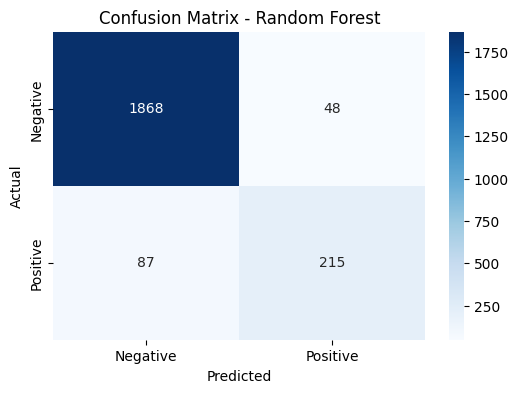





Testing Logistic Regression...
Classification Report:
               precision    recall  f1-score   support

           0     0.9487    0.7714    0.8509      1916
           1     0.3364    0.7351    0.4615       302

    accuracy                         0.7665      2218
   macro avg     0.6425    0.7532    0.6562      2218
weighted avg     0.8653    0.7665    0.7979      2218



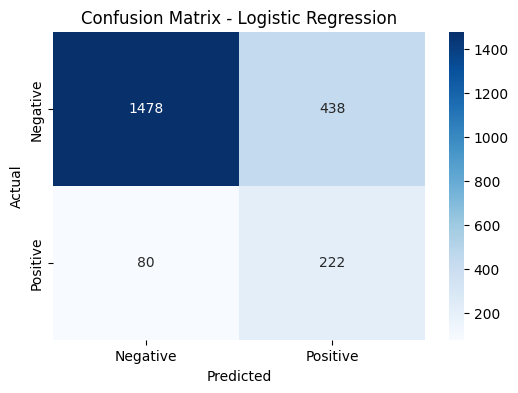





Testing SVM...
Classification Report:
               precision    recall  f1-score   support

           0     0.9489    0.9295    0.9391      1916
           1     0.6041    0.6821    0.6407       302

    accuracy                         0.8959      2218
   macro avg     0.7765    0.8058    0.7899      2218
weighted avg     0.9019    0.8959    0.8985      2218



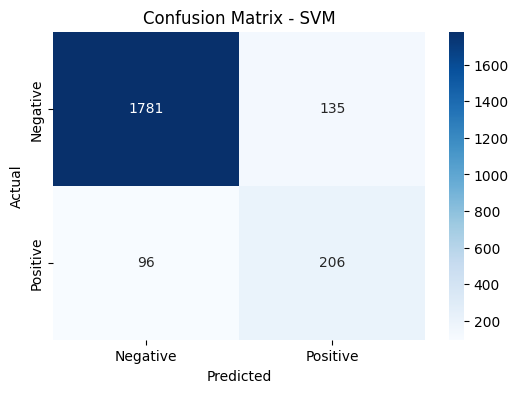





Testing Decision Tree...
Classification Report:
               precision    recall  f1-score   support

           0     0.9591    0.9181    0.9381      1916
           1     0.5911    0.7517    0.6618       302

    accuracy                         0.8954      2218
   macro avg     0.7751    0.8349    0.8000      2218
weighted avg     0.9090    0.8954    0.9005      2218



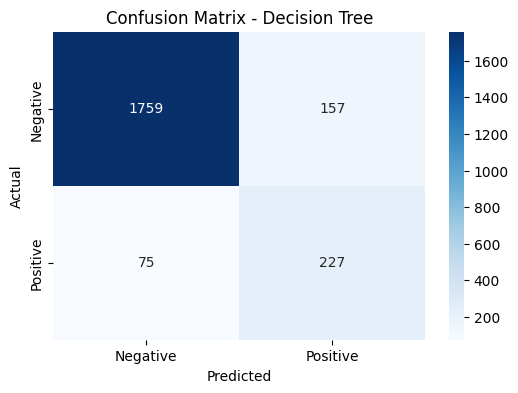





Testing KNN...
Classification Report:
               precision    recall  f1-score   support

           0     0.9333    0.8032    0.8634      1916
           1     0.3374    0.6358    0.4409       302

    accuracy                         0.7804      2218
   macro avg     0.6354    0.7195    0.6521      2218
weighted avg     0.8522    0.7804    0.8059      2218



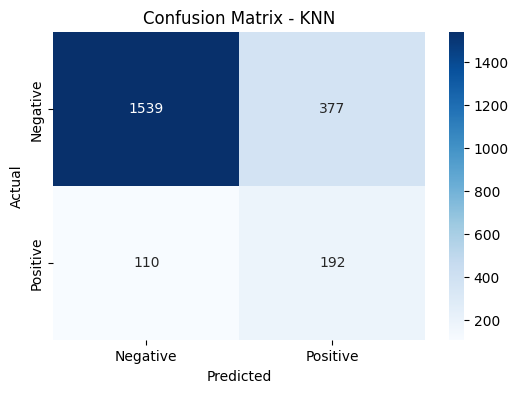

In [ ]:
#Importing the necessary packages and models
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Highlighting quantitative variables so that only they are standardized in pre-processing
num_features = ['account_length', 'number_vmail_messages', 'total_day_minutes',
                'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

cat_features = ['international_plan', 'voice_mail_plan', '408', '415', '510']

preprocessor = ColumnTransformer([
    ('num_scaler', StandardScaler(), num_features),
    ('passthrough', 'passthrough', cat_features)
])

#List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

#Defining the number of folds for Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#List to store the results
results = []

#Testing all models
for name, model in models.items():
    print(f"\nTesting {name}...")

    #Creating the pipeline
    pipeline = ImbPipeline([
        ('preprocessing', preprocessor),
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
        ('classifier', model)
    ])

    #Getting Predictions with Cross-Validation
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=cv)

    #Calculating metrics
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    accuracy = accuracy_score(y_train, y_pred)

    results.append([name, recall, precision, accuracy])

    #Creating classification Report and confusion matrix
    print("Classification Report:\n", classification_report(y_train, y_pred, digits=4))
    cm = confusion_matrix(y_train, y_pred)

    #Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print('\n\n')

#Creating a dataframe with the results
df_results = pd.DataFrame(results, columns=['Model', 'Recall', 'Precision', 'Accuracy'])



## Choosing the best Models

In churn analysis, our main goal is to **correctly identify customers who will cancel**, as this allows the company to take preventive actions to retain them. For this reason, **Recall will be our main metric**, as it measures the proportion of customers who actually canceled and who were correctly classified by the model.

However, **we will also evaluate Precision** in the background, as it helps us ensure that, when predicting churn, **we are minimizing false positives, avoiding unnecessary alarms**.

In [ ]:
#Displaying the table with the main metrics
print("\n📊 Model Performance Summary:")
df_results


📊 Model Performance Summary:


,Model,Recall,Precision,Accuracy
0,Random Forest,0.711921,0.817490,0.939134
1,Logistic Regression,0.735099,0.336364,0.766456
2,SVM,0.682119,0.604106,0.895852
3,Decision Tree,0.751656,0.591146,0.895401
4,KNN,0.635762,0.337434,0.780433


The goal is to **choose 2 models**. Random Forest, Logistic regression and Decision tree had the best recall rate, but the Logistic regression model had a lower precision rate. Therefore, **Random Forest and Decision tree will be chosen for the next stage**.

##Hyperparameters Tuning

Hyperparameter tuning is **select the best combination of hyperparameters** (e.g., number of estimators, learning rate, or tree depth) that allow the model to generalize well to unseen data, **maximizing its predictive accuracy while minimizing overfitting**.


To this **RandomizedSearchCV will be used**. It randomly samples from the specified hyperparameter space for a given number of iterations and evaluates each combination using cross-validation. RandomizedSearch helps to identify the best performing hyperparameters for the model, balancing accuracy and computational efficiency.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Model dictionary (Random Forest and Decision Tree)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Hyperparameter grids for RandomizedSearchCV
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_dt = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store metrics
metrics = []

# Loop through models and perform training/evaluation with and without hyperparameter tuning
for name, model in models.items():
    # Create pipeline without hyperparameter tuning
    pipeline = ImbPipeline([
        ('preprocessing', preprocessor),
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Oversampling within CV
        ('classifier', model)
    ])

    # Evaluate without hyperparameter tuning
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=cv)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    accuracy = accuracy_score(y_train, y_pred)

    metrics.append([name + ' (No Hyperparameter Tuning)', recall, precision, accuracy])

    # Hyperparameter tuning with RandomizedSearchCV for Random Forest and Decision Tree
    if name == 'Random Forest':
        random_search_rf = RandomizedSearchCV(pipeline, param_distributions=param_grid_rf, n_iter=10, cv=cv, random_state=42, n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
    elif name == 'Decision Tree':
        random_search_dt = RandomizedSearchCV(pipeline, param_distributions=param_grid_dt, n_iter=10, cv=cv, random_state=42, n_jobs=-1)
        random_search_dt.fit(X_train, y_train)
        best_model = random_search_dt.best_estimator_

    # Evaluate with hyperparameter tuning
    y_pred_tuned = cross_val_predict(best_model, X_train, y_train, cv=cv)
    recall_tuned = recall_score(y_train, y_pred_tuned)
    precision_tuned = precision_score(y_train, y_pred_tuned)
    accuracy_tuned = accuracy_score(y_train, y_pred_tuned)

    metrics.append([name + ' (With Hyperparameter Tuning)', recall_tuned, precision_tuned, accuracy_tuned])

# Create a DataFrame with the results
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Recall', 'Precision', 'Accuracy'])

# Display the results as a table
print("\n📊 Performance summary of models with hyperparameterization:")
metrics_df



📊 Performance summary of models with hyperparameterization:


,Model,Recall,Precision,Accuracy
0,Random Forest (No Hyperparameter Tuning),0.711921,0.817490,0.939134
1,Random Forest (With Hyperparameter Tuning),0.748344,0.827839,0.944545
2,Decision Tree (No Hyperparameter Tuning),0.731788,0.572539,0.889089
3,Decision Tree (With Hyperparameter Tuning),0.778146,0.638587,0.909829


##Ensemble

In this section, **the two models will be combined to improve the performance** of the final model.

The **voting classifier** is an effective way to combine models, where each model contributes its prediction and the final decision is based on the majority or average of the predictions.

In [ ]:
from sklearn.ensemble import VotingClassifier

#Create a list of the tuned models
models_tuned = {
    'Random Forest (With Hyperparameter Tuning)': random_search_rf.best_estimator_,
    'Decision Tree (With Hyperparameter Tuning)': random_search_dt.best_estimator_
}

#Create an ensemble model using VotingClassifier (soft voting)
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', models_tuned['Random Forest (With Hyperparameter Tuning)']),
    ('decision_tree', models_tuned['Decision Tree (With Hyperparameter Tuning)'])
], voting='soft')

#Evaluating the ensemble model
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = cross_val_predict(ensemble_model, X_train, y_train, cv=cv)
recall_ensemble = recall_score(y_train, y_pred_ensemble)
precision_ensemble = precision_score(y_train, y_pred_ensemble)
accuracy_ensemble = accuracy_score(y_train, y_pred_ensemble)

# Add the ensemble results to the metrics list
metrics.append(['Ensemble (Random Forest + Decision Tree)', recall_ensemble, precision_ensemble, accuracy_ensemble])

# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Recall', 'Precision', 'Accuracy'])

# Display the results as a table
print("\n📊 Performance summary of models with hyperparameterization and with Ensemble:")
metrics_df




📊 Performance summary of models with hyperparameterization and with Ensemble:


,Model,Recall,Precision,Accuracy
0,Random Forest (No Hyperparameter Tuning),0.711921,0.817490,0.939134
1,Random Forest (With Hyperparameter Tuning),0.748344,0.827839,0.944545
2,Decision Tree (No Hyperparameter Tuning),0.731788,0.572539,0.889089
3,Decision Tree (With Hyperparameter Tuning),0.778146,0.638587,0.909829
4,Ensemble (Random Forest + Decision Tree),0.771523,0.697605,0.923354


The **recall rate of the ensemble model was very close** to that of the Decision tree model with hyperparameters, which had the highest recall rate. In addition, the **ensemble model had higher precision and accuracy rates** than the Decision tree model with hyperparameters.

#Evaluation

Now we will perform the **final evaluation of the ensemble model** using the **test data,** which were separated before modeling.

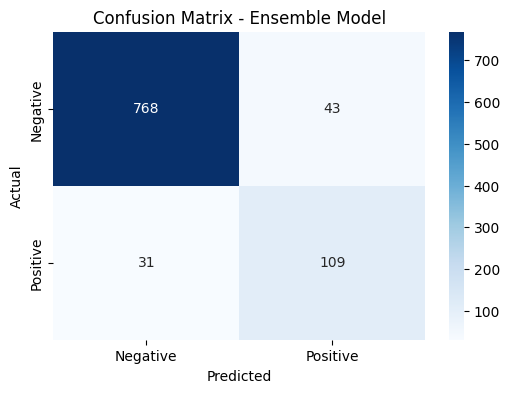


📊 Performance summary of models with hyperparameterization and with Ensemble:


,Model,Recall,Precision,Accuracy
0,Random Forest (With Hyperparameter Tuning),0.748344,0.827839,0.944545
1,Decision Tree (With Hyperparameter Tuning),0.778146,0.638587,0.909829
2,Ensemble (Random Forest + Decision Tree),0.771523,0.697605,0.923354
3,Ensemble (TEST DATA),0.778571,0.717105,0.922187


In [ ]:
#Evaluating the ensemble model on the test data
y_pred_test = ensemble_model.predict(X_test)

#Calculating metrics
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

#Generating a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Ensemble Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Adding the new row with the ensemble model metrics with the teste data
metrics.append(['Ensemble (TEST DATA)', recall_test, precision_test, accuracy_test])
# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Recall', 'Precision', 'Accuracy'])

# Display the results as a table
print("\n📊 Performance summary of models with hyperparameterization and with Ensemble:")
metrics_df = metrics_df.drop([0, 2]).reset_index(drop=True)
metrics_df


Model evaluation shows **promising results**. After fine-tuning the hyperparameters of the Random Forest and Decision Tree models, their performance was further improved when combined into an ensemble. The final ensemble model demonstrated **strong recall (0.778)**, precision (0.717), and accuracy (0.922) on the test data, indicating its robustness in predicting churn. This performance suggests that the ensemble approach, leveraging the strengths of both models, **is effective for the task at hand and can be trusted for future predictions**.

With these results, **the model is now ready for deployment.** By integrating it into an application, users will be able to input customer data and receive a churn probability score in real-time. This will enable businesses to proactively identify at-risk customers and implement targeted retention strategies. **The model's strong performance ensures that it can be a valuable tool for decision-making,** helping to minimize churn and improve customer satisfaction.